In [232]:
import torch
from torch import nn
import matplotlib.pyplot as plt                         # Visualization
from sklearn.model_selection import train_test_split    # Splitting Data

from sklearn.datasets import make_circles, make_blobs   # Creating the dataset

In [233]:
# Download helper functions
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists.")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
    print("Download successful: helper_functions.py")

helper_functions.py already exists.


In [234]:
# Importing the helper function
from helper_functions import plot_decision_boundary     # Visualization

In [235]:
# Device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


# Binary Classification

## Data

In [236]:
# Creating our features and labels
X, y = make_circles(n_samples = 1000,
                    noise = 0.05)

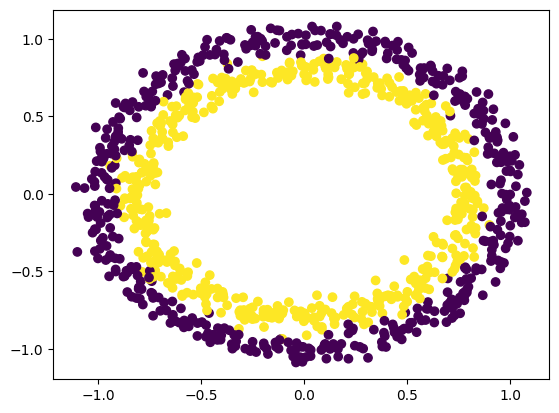

In [237]:
# Charting the data
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y)

In [238]:
# Moving data to tensors
X = torch.tensor(X, dtype = torch.float32, device = device)
y = torch.tensor(y, dtype = torch.float32, device = device)

In [239]:
# Splitting datasets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 0)

print("X_train shape: " + str(X_train.shape) + " \nDatatype: " + str(X_train.dtype) + " \nDevice: " + str(X_train.device))
print("\ny_train shape: " + str(y_train.shape))

print("\nX_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: torch.Size([750, 2]) 
Datatype: torch.float32 
Device: cuda:0

y_train shape: torch.Size([750])

X_test shape: torch.Size([250, 2])
y_test shape: torch.Size([250])


## Model

- Using activation functions to introduce non-linearity. The non-linearity they offer from their structure. Without it, a neural network is a bunch of straight lines.

In [240]:
# Creating the model class
class CircleClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.sequence = nn.Sequential(                      # input (2), 2 hidden (8, 8), output (1)
            nn.Linear(in_features = 2, out_features = 8),
            nn.ReLU(),
            nn.Linear(in_features = 8, out_features = 8),
            nn.ReLU(),
            nn.Linear(in_features = 8, out_features = 1)    # Return logits
        )
    
    def forward(self, x):
        return self.sequence(x)

In [241]:
# Creating an instance of model
model_circle = CircleClassificationModel().to(device)
print(model_circle)

CircleClassificationModel(
  (sequence): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)


In [242]:
# Loss function and Optimizer
loss_function = nn.BCEWithLogitsLoss()      # Binary Cross Entropy with Sigmoid()

optimizer = torch.optim.SGD(params = model_circle.parameters(),
                            lr = 0.1)

In [243]:
# Accuracy function
def accuracy_function(y_pred, y_true):
    return (torch.eq(y_pred, y_true).sum().item() / len(y_pred)) * 100

## Training and Testing

- The output of the neural network in classification is known as `raw logits`. This is because they are just numbers and have to be processed further for more understandable representation. This is done using activation functions like sigmoid or softmax.

- The loss function we are using is also `BCEWithLogitsLoss`. We can pass logits directly to the loss function.

- `raw logits` -> `predicted probability` -> `predicted labels`

In [244]:
# Converting raw logits to predicted labels

# Raw logits
with torch.inference_mode():
    y_pred_notrain = model_circle(X_test)
    
# Activation (outputs probability)
y_pred_notrain = torch.sigmoid(y_pred_notrain)

# Labels by rounding
y_pred_notrain = torch.round(y_pred_notrain)

print(y_pred_notrain[:5])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')


In [245]:
# Training and Testing
epochs = 1000

for epoch in range(epochs):
    ## Training
    model_circle.train()
    
    y_logits = model_circle(X_train).squeeze()          # Forward Pass
    training_loss = loss_function(y_logits, y_train)    # Loss Calculation
    optimizer.zero_grad()                               # Parameters grad to zero
    training_loss.backward()                            # Backward Propagation
    optimizer.step()                                    # Gradient Descent
    
    ## Testing
    model_circle.eval()
    
    y_logits = model_circle(X_test).squeeze() 
    testing_loss = loss_function(y_logits, y_test)
    
    y_pred = torch.round(torch.sigmoid(y_logits))
    testing_accuracy = accuracy_function(y_pred, y_test)
    
    ## Progress
    if epoch % 50 == 0:
        print(f"Epoch: {epoch}  |   Training Loss: {training_loss:.4f}  | Testing Loss: {testing_loss:.4f}  |   Accuracy: {testing_accuracy:.2f}%")

Epoch: 0  |   Training Loss: 0.6928  | Testing Loss: 0.6959  |   Accuracy: 47.20%


Epoch: 50  |   Training Loss: 0.6908  | Testing Loss: 0.6941  |   Accuracy: 46.00%
Epoch: 100  |   Training Loss: 0.6886  | Testing Loss: 0.6923  |   Accuracy: 55.20%
Epoch: 150  |   Training Loss: 0.6873  | Testing Loss: 0.6908  |   Accuracy: 54.00%
Epoch: 200  |   Training Loss: 0.6859  | Testing Loss: 0.6895  |   Accuracy: 53.20%
Epoch: 250  |   Training Loss: 0.6844  | Testing Loss: 0.6882  |   Accuracy: 50.80%
Epoch: 300  |   Training Loss: 0.6826  | Testing Loss: 0.6868  |   Accuracy: 52.00%
Epoch: 350  |   Training Loss: 0.6805  | Testing Loss: 0.6850  |   Accuracy: 52.40%
Epoch: 400  |   Training Loss: 0.6777  | Testing Loss: 0.6826  |   Accuracy: 57.20%
Epoch: 450  |   Training Loss: 0.6748  | Testing Loss: 0.6801  |   Accuracy: 59.20%
Epoch: 500  |   Training Loss: 0.6713  | Testing Loss: 0.6770  |   Accuracy: 60.80%
Epoch: 550  |   Training Loss: 0.6670  | Testing Loss: 0.6733  |   Accuracy: 62.80%
Epoch: 600  |   Training Loss: 0.6616  | Testing Loss: 0.6684  |   Accuracy: 

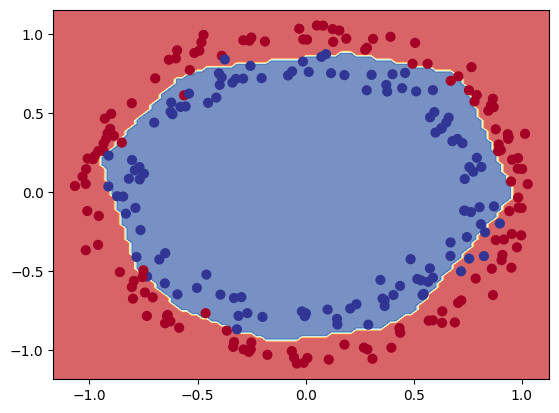

In [246]:
plot_decision_boundary(model = model_circle, X = X_test, y = y_test)

# Multi-class Classification

## Data

In [247]:
# Creating the data
X, y = make_blobs(n_samples = 1000, 
                  n_features = 2, 
                  centers = 5, 
                  cluster_std = 1.33,
                  random_state = 123)

In [248]:
# Move data to tensors
X = torch.tensor(X, dtype = torch.float32, device = device)
y = torch.tensor(y, dtype = torch.int64, device = device)

In [249]:
# Splitting the datasets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    stratify = y.cpu())        # split - good representation - class population                   

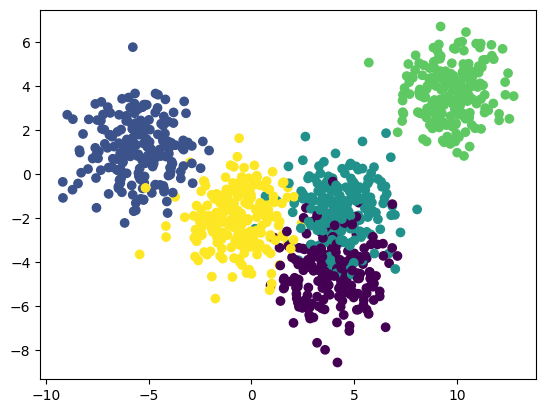

In [250]:
# Visualization
plt.scatter(X[:, 0].cpu(),
            X[:, 1].cpu(),
            c = y.cpu())

## Model

In [251]:
# Building the model
model_blob = nn.Sequential(                         # input (2), 2 hidden (8, 8), output(5)
    nn.Linear(in_features = 2, out_features = 8),
    nn.Sigmoid(),                                   # Sigmoid activation
    nn.Linear(in_features = 8, out_features = 8),
    nn.Sigmoid(),
    nn.Linear(in_features = 8, out_features = 5)
).to(device = device)                               # Moving the model to 'device'                 

In [252]:
# Loss function and Optimizer
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_blob.parameters(),
                            lr = 0.05)

## Training and Testing

In [253]:
epochs = 5000

for epoch in range(epochs):
    ### Training
    model_blob.train()
    
    # Forward pass with labels
    y_pred = model_blob(X_train)
    y_pred_labels = torch.argmax(y_pred, dim = 1)
    
    # Loss and accuracy
    training_loss = loss_function(y_pred, y_train)
    training_accuracy = accuracy_function(y_pred_labels, y_train)
    
    # Zero Grad
    optimizer.zero_grad()
    
    # Back Prop
    training_loss.backward()
    
    # Gradient Descent
    optimizer.step()
    
    ### Testing
    model_blob.eval()
    
    # Forward pass with labels
    y_pred = model_blob(X_test)
    y_pred_labels = torch.argmax(y_pred, dim = 1)
    
    # Loss and accuracy
    testing_loss = loss_function(y_pred, y_test)
    testing_accuracy = accuracy_function(y_pred_labels, y_test)
    
    ## Progress
    if epoch % 250 == 0:
        print(f"Epoch: {epoch}  |  Training Loss: {training_loss:.4f}  |  Training Accuracy: {training_accuracy:.2f}%   |   Testing Loss: {testing_loss:.4f}  |  Testing Accuracy: {testing_accuracy:.2f}%")

Epoch: 0  |  Training Loss: 1.6288  |  Training Accuracy: 20.00%   |   Testing Loss: 1.6268  |  Testing Accuracy: 20.00%
Epoch: 250  |  Training Loss: 1.4836  |  Training Accuracy: 56.13%   |   Testing Loss: 1.4829  |  Testing Accuracy: 51.60%
Epoch: 500  |  Training Loss: 1.1999  |  Training Accuracy: 50.00%   |   Testing Loss: 1.1974  |  Testing Accuracy: 47.20%
Epoch: 750  |  Training Loss: 1.0444  |  Training Accuracy: 57.33%   |   Testing Loss: 1.0395  |  Testing Accuracy: 58.00%
Epoch: 1000  |  Training Loss: 0.9627  |  Training Accuracy: 65.33%   |   Testing Loss: 0.9557  |  Testing Accuracy: 64.40%
Epoch: 1250  |  Training Loss: 0.8749  |  Training Accuracy: 72.93%   |   Testing Loss: 0.8645  |  Testing Accuracy: 71.20%
Epoch: 1500  |  Training Loss: 0.7798  |  Training Accuracy: 77.07%   |   Testing Loss: 0.7662  |  Testing Accuracy: 76.40%
Epoch: 1750  |  Training Loss: 0.6934  |  Training Accuracy: 81.20%   |   Testing Loss: 0.6795  |  Testing Accuracy: 82.40%
Epoch: 2000  |

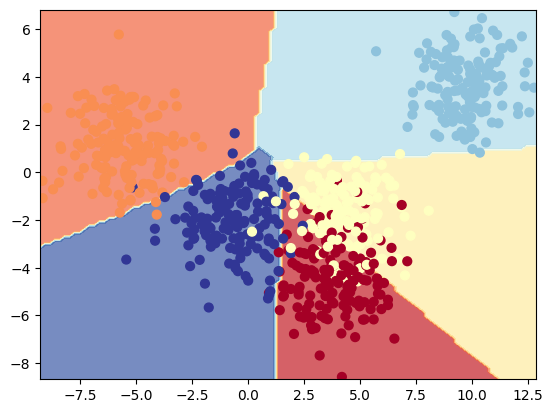

In [254]:
plot_decision_boundary(model_blob, X_train, y_train)

- This data can be trained using just Linear layers too. Most of the blobs lie in a specified area which can be segmented using just lines.

## Metrics for Classification Models

- **Accuracy**: Percentage of right. Not good for class-imbalanced datasets.

- **Precision**: False-Positives are to be lowered. (Spam Email Model: Classifying important emails as spam can cause frustration)

- **Recall**: False-Negatives are to be lowered. (Cancer Prediction Model: It is better to predict wrong and go through the tests with the doctor than having cancer by being unaware)

- **F-1 Score**: Combination of Precision and Recall. Good overall metric.

- **Confusion Matrix**: Visualization of TP, TN, FP, FN.

- **Classification Report**